# Solution of cuisine classification problem
# Shuvalov Denis 5030103/00301

## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import joblib
import json
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

import torch
from torch import nn
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

from matplotlib import rcParams
rcParams['figure.figsize'] = 8.7,5.27

# Reading and preprocessing data

In [2]:
data = pd.read_json('data.json')
data

,id,cuisine,ingredients
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes..."
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g..."
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,22213,indian,"[water, vegetable oil, wheat, salt]"
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe..."
...,...,...,...
39769,29109,irish,"[light brown sugar, granulated sugar, butter, ..."
39770,11462,italian,"[KRAFT Zesty Italian Dressing, purple onion, b..."
39771,2238,irish,"[eggs, citrus fruit, raisins, sourdough starte..."
39772,41882,chinese,"[boneless chicken skinless thigh, minced garli..."


In [3]:
list_of_dishes = data['ingredients'].values
all_ingridients = []
for element in list_of_dishes:
    all_ingridients.extend(element)
ingredients = sorted(list(set(all_ingridients)))
test_ingredients = ingredients.copy()
data.loc[:, ingredients] = 0

In [4]:
data

,id,cuisine,ingredients,( oz.) tomato sauce,( oz.) tomato paste,(10 oz.) frozen chopped spinach,"(10 oz.) frozen chopped spinach, thawed and squeezed dry",(14 oz.) sweetened condensed milk,(14.5 oz.) diced tomatoes,(15 oz.) refried beans,...,yukon gold potatoes,yuzu,yuzu juice,za'atar,zest,zesty italian dressing,zinfandel,ziti,zucchini,zucchini blossoms
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,22213,indian,"[water, vegetable oil, wheat, salt]",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39769,29109,irish,"[light brown sugar, granulated sugar, butter, ...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39770,11462,italian,"[KRAFT Zesty Italian Dressing, purple onion, b...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39771,2238,irish,"[eggs, citrus fruit, raisins, sourdough starte...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39772,41882,chinese,"[boneless chicken skinless thigh, minced garli...",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
data['cuisine'].nunique()

20

In [6]:
for i, ingredients in enumerate(data['ingredients']):
    for ingredient in ingredients:
        data.loc[i, ingredient] = 1

In [7]:
data.drop(columns=['ingredients'], inplace=True)

In [8]:
data

,id,cuisine,( oz.) tomato sauce,( oz.) tomato paste,(10 oz.) frozen chopped spinach,"(10 oz.) frozen chopped spinach, thawed and squeezed dry",(14 oz.) sweetened condensed milk,(14.5 oz.) diced tomatoes,(15 oz.) refried beans,1% low-fat buttermilk,...,yukon gold potatoes,yuzu,yuzu juice,za'atar,zest,zesty italian dressing,zinfandel,ziti,zucchini,zucchini blossoms
0,10259,greek,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,25693,southern_us,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,20130,filipino,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,22213,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,13162,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39769,29109,irish,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39770,11462,italian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39771,2238,irish,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39772,41882,chinese,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Data analysis and data plotting

For each cuisine plotting top 10 ingridients with highest frequency

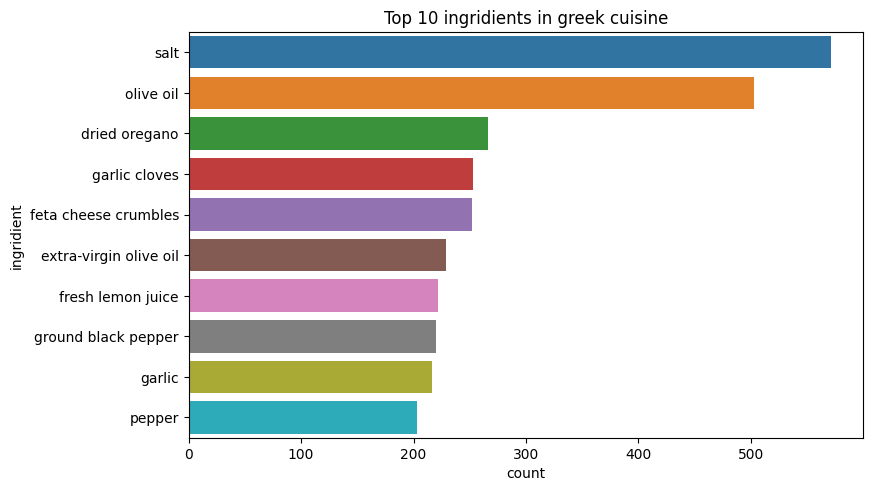

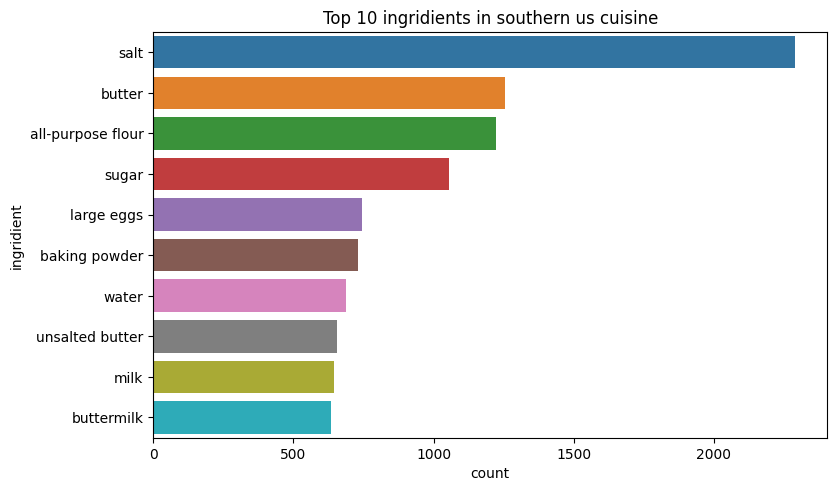

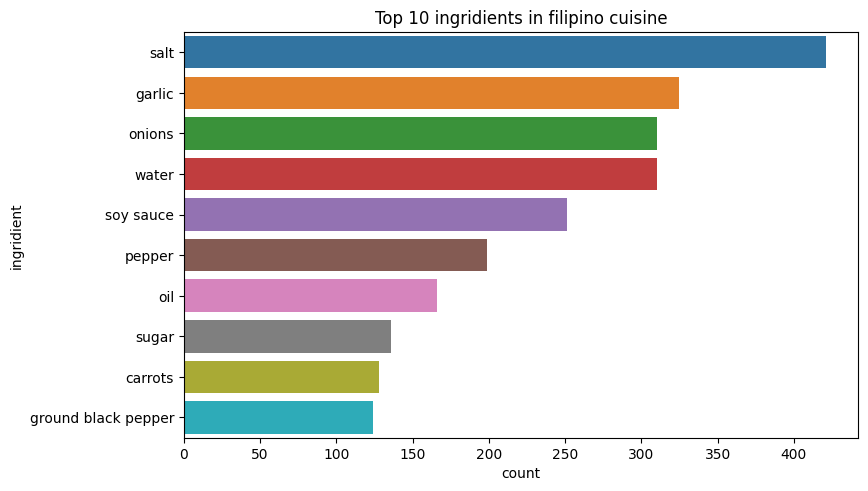

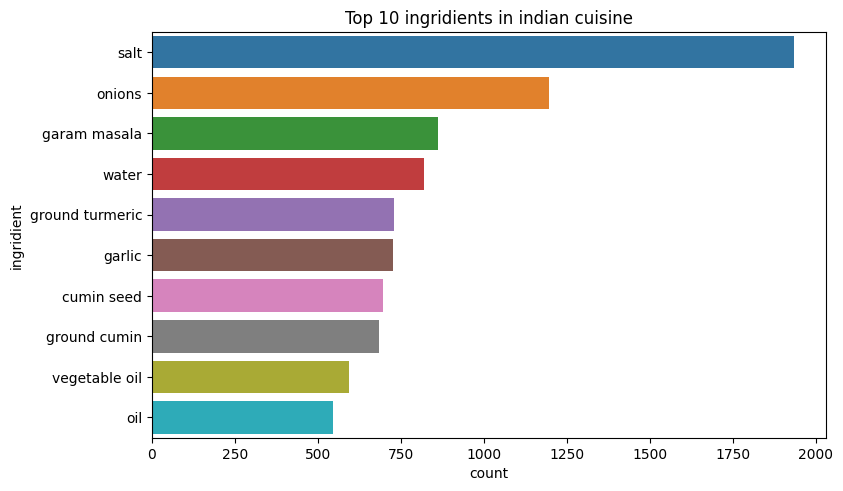

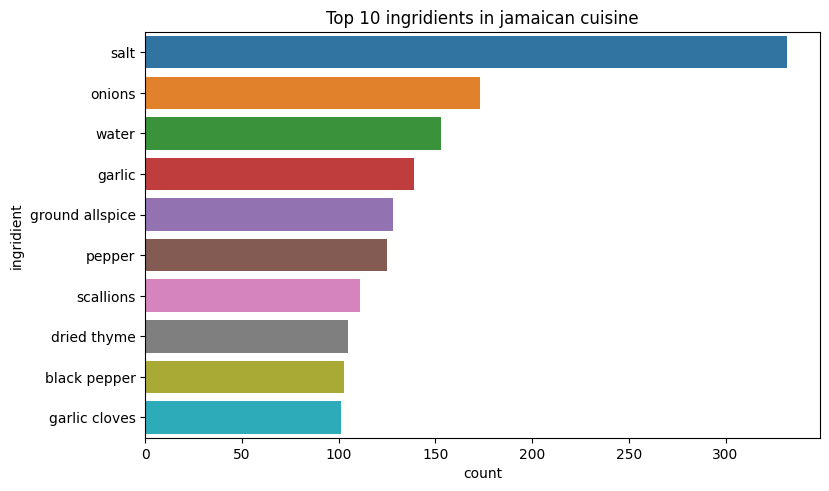

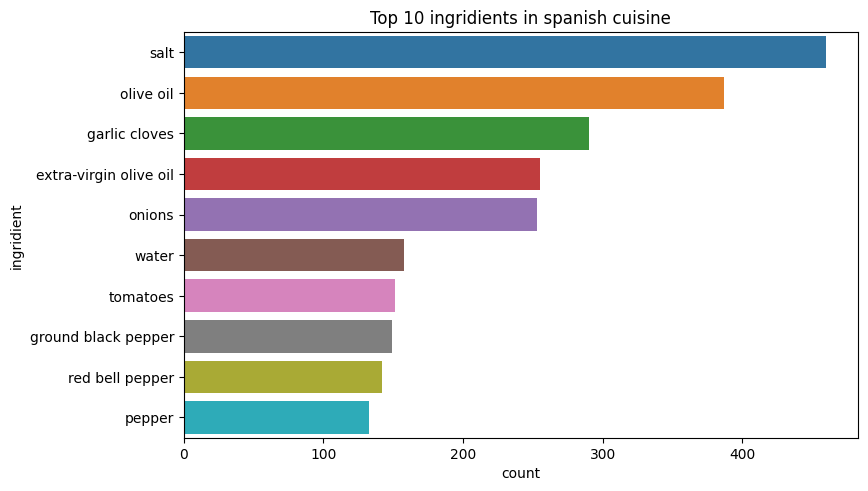

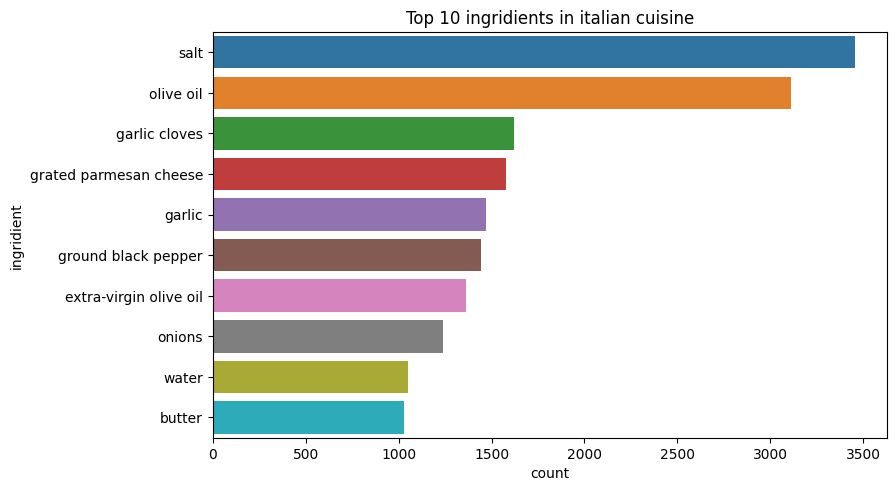

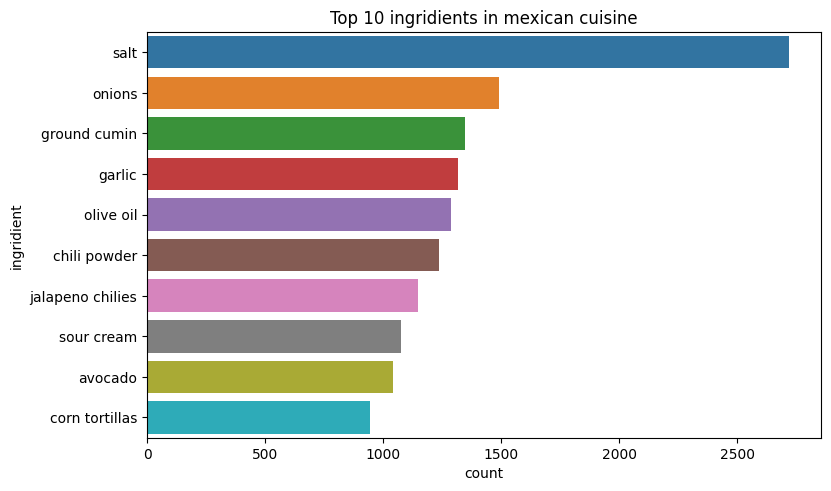

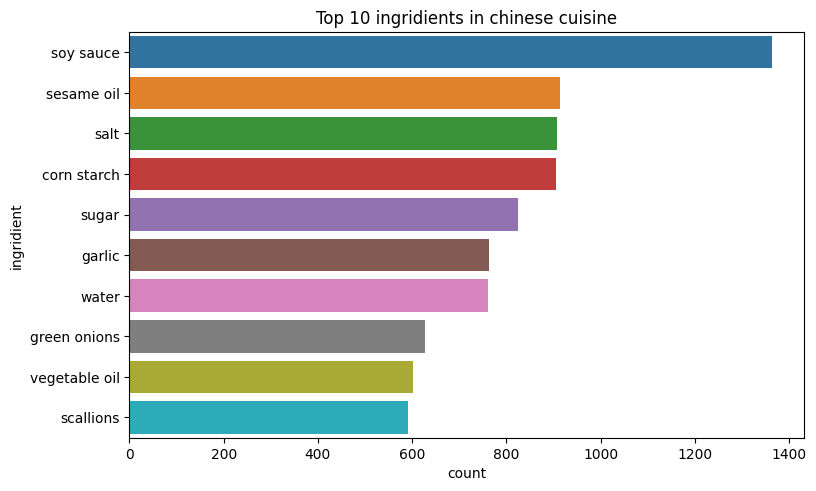

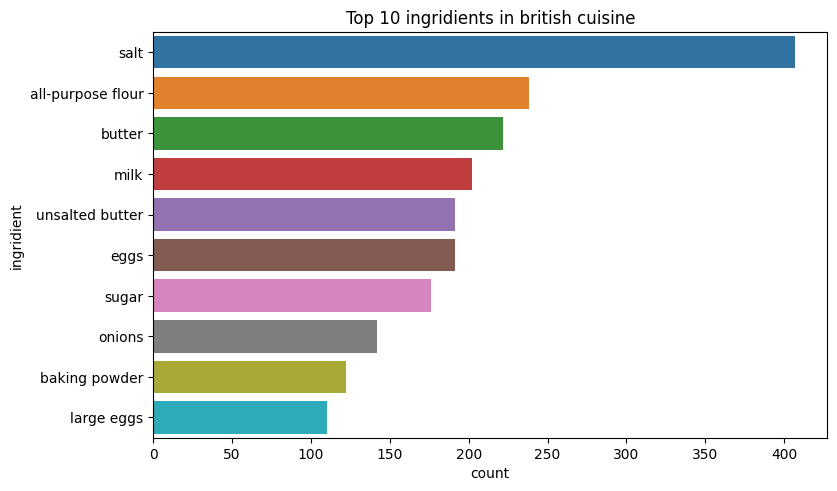

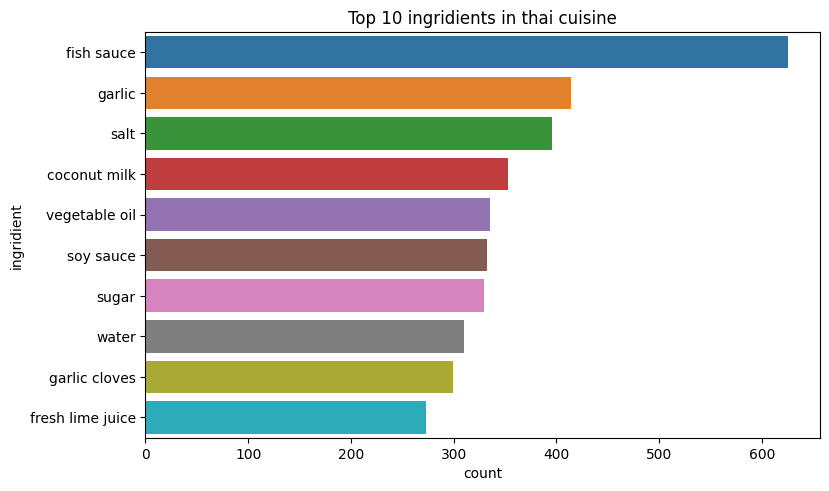

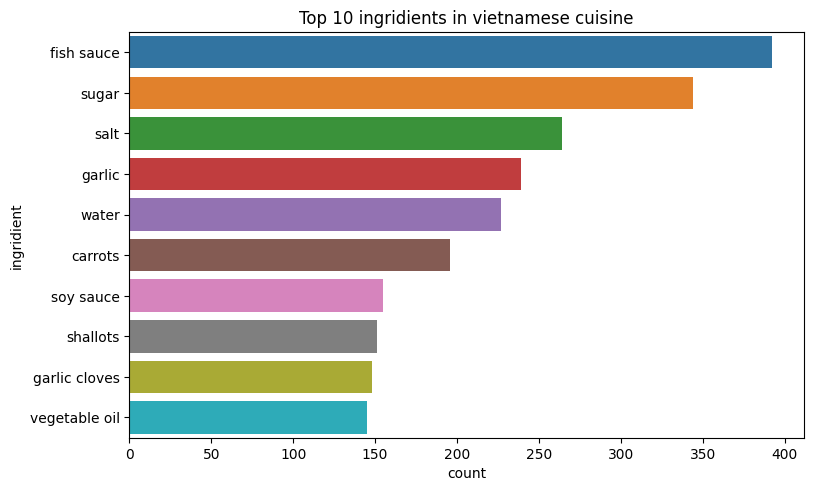

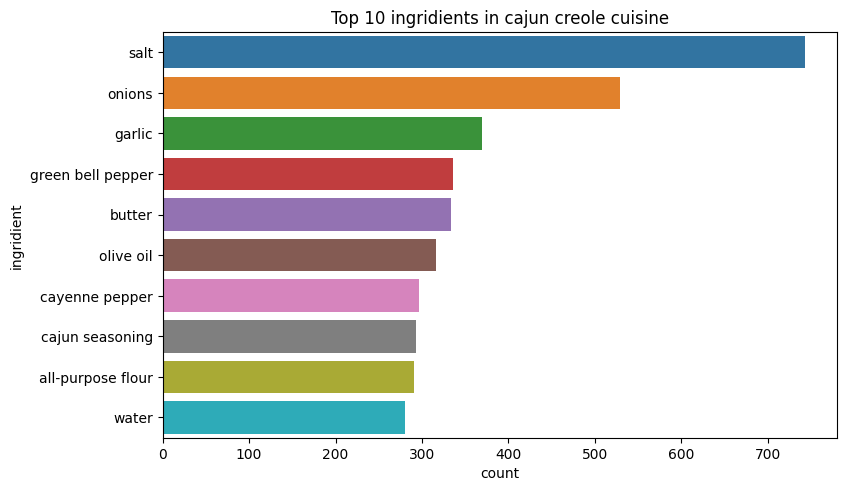

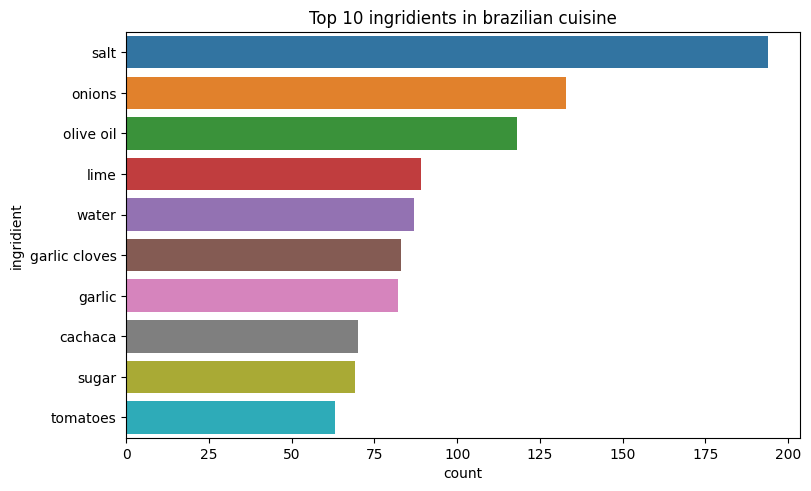

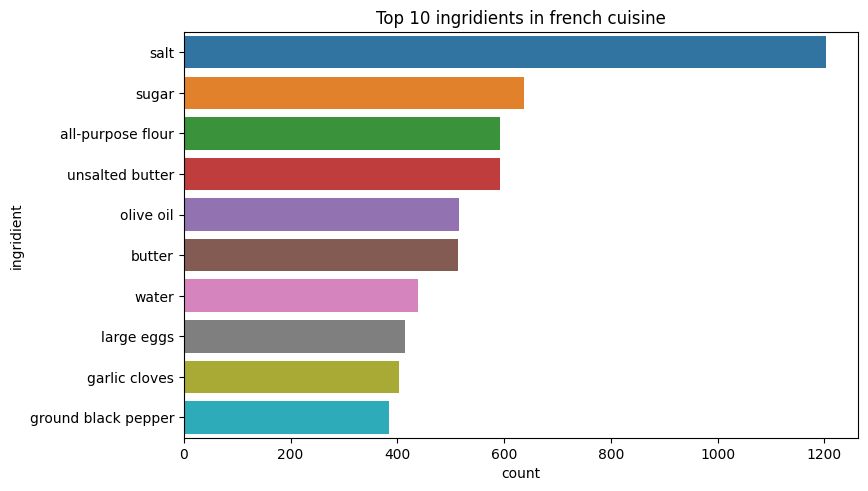

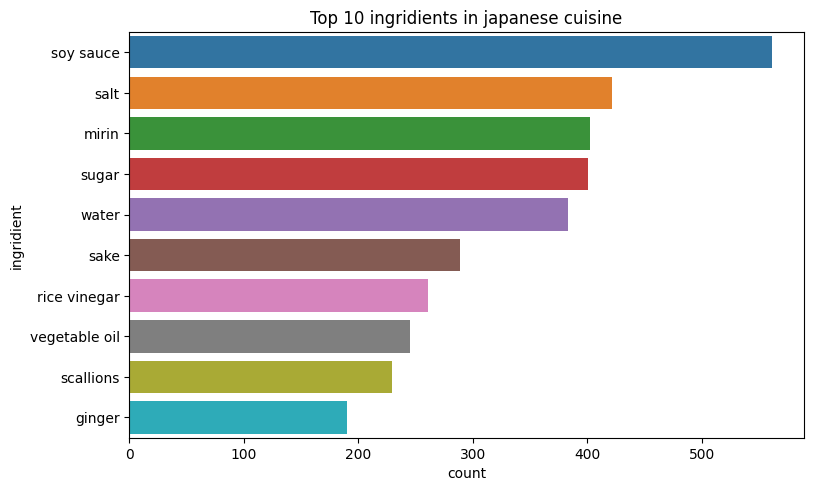

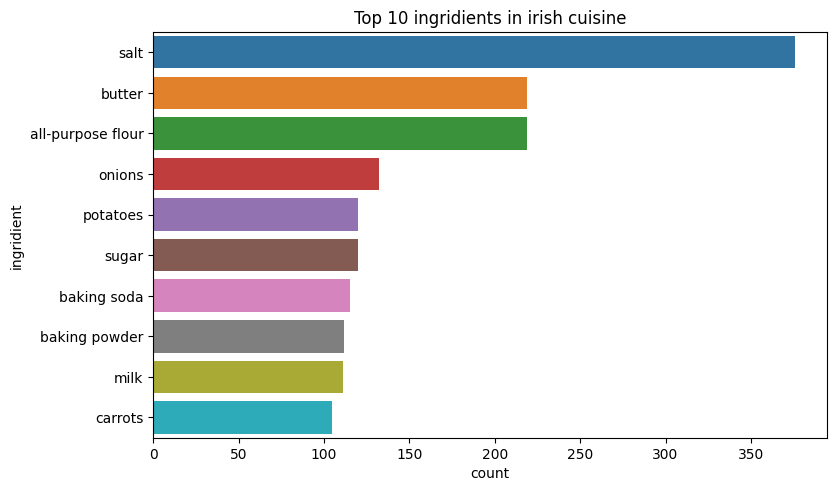

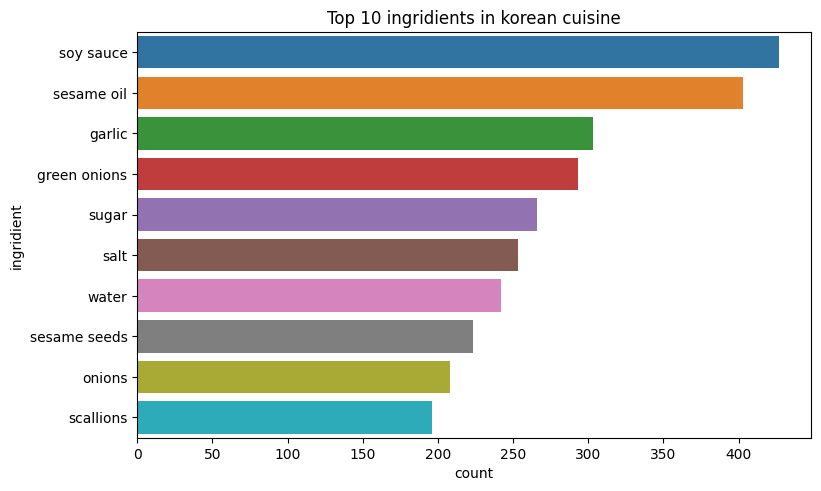

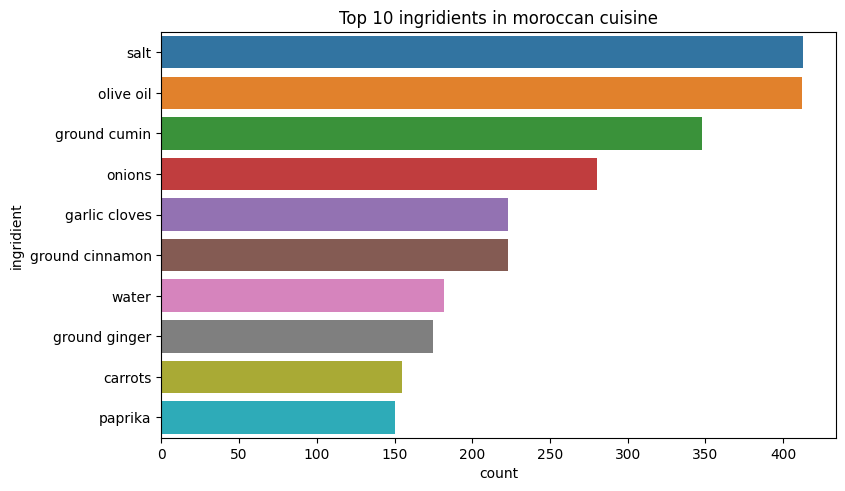

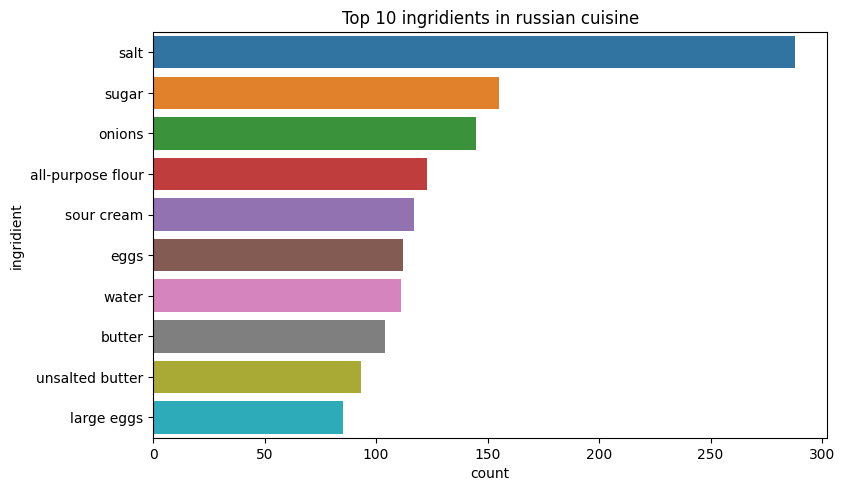

In [9]:
for cuisine_name in data['cuisine'].unique():
    tmp_df = data[data['cuisine'] == cuisine_name].drop(columns=['id', 'cuisine'])
    tmp_df = tmp_df.sum(axis=0).sort_values(ascending=False).head(10)
    tmp_df = pd.DataFrame({'ingridient': tmp_df.index, 'count': tmp_df.values})
    fig = plt.figure()
    plt.title(f'Top 10 ingridients in {cuisine_name.replace("_", " ")} cuisine')
    sns.barplot(tmp_df, x='count', y='ingridient')

Also plot distribution of the number of types of cuisines in our data

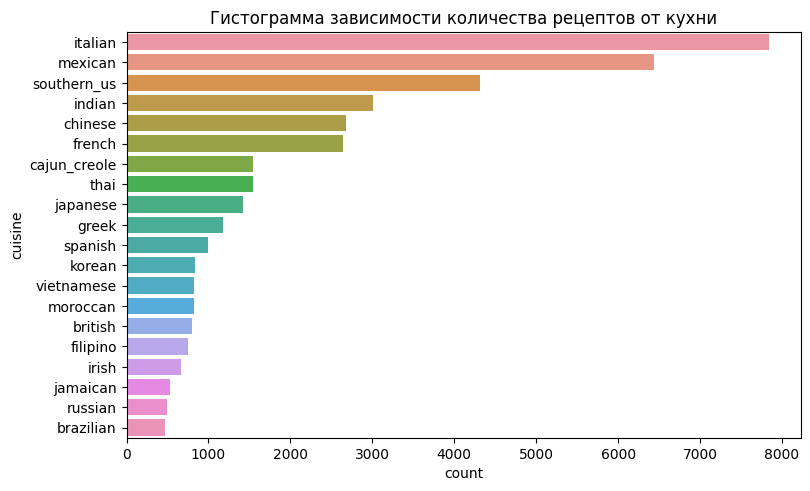

In [10]:
plt.title('Гистограмма зависимости количества рецептов от кухни')
sns.countplot(data, y='cuisine', order=data['cuisine'].value_counts().index);

# Selection of target and features

In [11]:
target = data['cuisine'].values
categorial_features = data.drop(columns=['cuisine', 'id']).values

In [12]:
X_train, X_test, y_train, y_test = train_test_split(categorial_features, target, random_state=861, test_size=0.3)

# Logistic regression

In [13]:
# обучение модели
clf_1 = LogisticRegression(n_jobs=-1)
clf_1.fit(X_train, y_train)
accuracy_score(clf_1.predict(X_test), y_test)
joblib.dump(clf_1, "Logistic_regression.pkl")
None

In [14]:
# чтение модели
clf_1 = joblib.load('Logistic_regression.pkl')
accuracy_score(clf_1.predict(X_test), y_test)

0.7757479259197184

# Random forest

In [19]:
# обучение модели
from sklearn.ensemble import RandomForestClassifier
clf_2 = RandomForestClassifier(n_jobs=-1)
params = {'n_estimators': [100 * i for i in range(1, 6)], 'max_depth': [5, 10]}
clf_2_random = RandomizedSearchCV(estimator=clf_2, scoring='accuracy', param_distributions=params)
clf_2_random.fit(X_train, y_train)
clf_2 = clf_2_random.best_estimator_
accuracy_score(clf_2.predict(X_test), y_test)
joblib.dump(clf_2, "Random_forest.pkl")

['Random_forest.pkl']

In [20]:
# чтение модели
clf_2 = joblib.load('Random_forest.pkl')
accuracy_score(clf_2.predict(X_test), y_test)

0.43057068633202045

# Neural network using Pytorch

In [13]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

In [14]:
class Cuisine_dataset(Dataset):
    def __init__(self, features, target):
        self.features = torch.tensor(features).to(torch.float32)
        self.target = torch.tensor(target).to(torch.int64)
    def __len__(self):
        return len(self.features)
    def __getitem__(self, idx):
        return self.features[idx, :], self.target[idx]        

In [15]:
encoder = LabelEncoder()
data['cuisine'] = encoder.fit_transform(data['cuisine'])
data

,id,cuisine,( oz.) tomato sauce,( oz.) tomato paste,(10 oz.) frozen chopped spinach,"(10 oz.) frozen chopped spinach, thawed and squeezed dry",(14 oz.) sweetened condensed milk,(14.5 oz.) diced tomatoes,(15 oz.) refried beans,1% low-fat buttermilk,...,yukon gold potatoes,yuzu,yuzu juice,za'atar,zest,zesty italian dressing,zinfandel,ziti,zucchini,zucchini blossoms
0,10259,6,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,25693,16,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,20130,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,22213,7,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,13162,7,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39769,29109,8,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39770,11462,9,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39771,2238,8,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39772,41882,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
X = data.drop(columns=['id', 'cuisine']).values
y = data['cuisine'].values

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=861, test_size=0.3)

In [18]:
train_dataset = Cuisine_dataset(X_train, y_train)
trainloader = DataLoader(train_dataset, batch_size=8, shuffle=True)
test_dataset = Cuisine_dataset(X_test, y_test)
testloader = DataLoader(test_dataset, batch_size=8, shuffle=True)

In [19]:
model = nn.Sequential(
    nn.Linear(6714, 150),
    nn.SiLU(),
    nn.Linear(150, 20)
)
criterion = torch.nn.CrossEntropyLoss()
optimezer = torch.optim.Adam(params=model.parameters(), lr=5e-4)
scheduler = torch.optim.lr_scheduler.ExponentialLR(optimezer, gamma=0.8)

Epoch №1, Training loss = 1.2138360152424708
Epoch №1, Accuracy on train = 66.29431414101505%
Epoch №1, Test loss = 0.8399403696597602
Epoch №1, Accuracy on test = 76.30101399480432%
----------------------------------------------------------------
Epoch №2, Training loss = 0.6602364631599263
Epoch №2, Accuracy on train = 80.93459286663554%
Epoch №2, Test loss = 0.7556972186893834
Epoch №2, Accuracy on test = 78.3960445822509%
----------------------------------------------------------------
Epoch №3, Training loss = 0.5187825764290223
Epoch №3, Accuracy on train = 84.87482489853095%
Epoch №3, Test loss = 0.7414440571320501
Epoch №3, Accuracy on test = 78.54688678454706%
----------------------------------------------------------------
Epoch №4, Training loss = 0.43708021800400015
Epoch №4, Accuracy on train = 87.27416400272978%
Epoch №4, Test loss = 0.748966569975443
Epoch №4, Accuracy on test = 78.49660605044834%
----------------------------------------------------------------


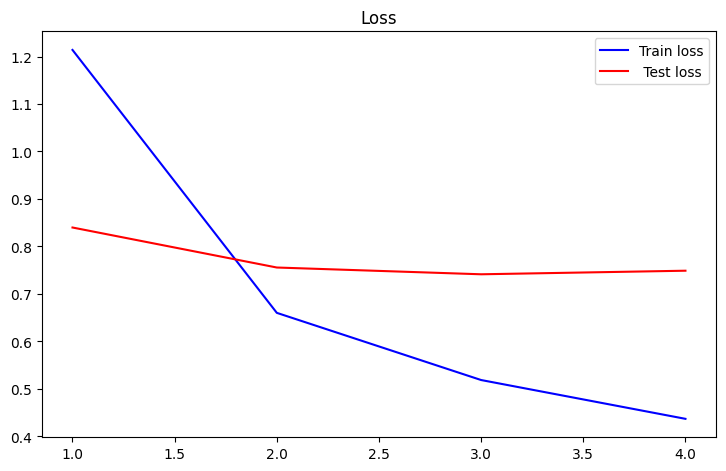

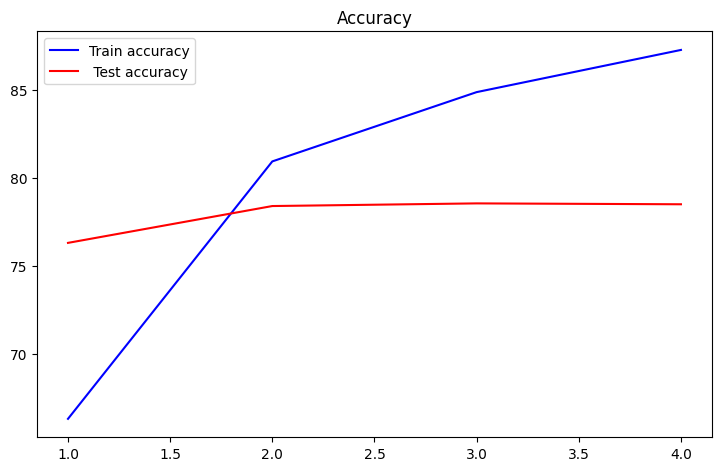

In [20]:
train_losses = []
test_losses = []
epoch_number = []
train_accuracy = []
test_accuracy = []

epochs = 4
model.to(device)
for epoch in range(epochs):
    running_loss = 0.0
    correct = 0
    total = 0
    model.train()
    for i, (X_train, label) in enumerate(trainloader):
        X_train = X_train.to(device)
        label = label.to(device)
        optimezer.zero_grad()
        prediction = model(X_train)
        _, predictions = torch.max(prediction.data, 1)
        loss = criterion(prediction, label)
        loss.backward()
        optimezer.step()
        running_loss += loss.item()
        total += label.size(0)
        correct += (predictions == label).sum().item()
    print(f'Epoch №{epoch + 1}, Training loss = {running_loss / len(trainloader)}')
    train_losses.append(running_loss / len(trainloader))
    epoch_number.append(epoch + 1)
    print(f'Epoch №{epoch + 1}, Accuracy on train = {correct / total * 100}%')
    train_accuracy.append(correct / total * 100)
    correct = 0
    total = 0
    running_loss = 0.0
    with torch.no_grad():
        model.eval()
        for X_val, label_val in testloader:
            X_val = X_val.to(device)
            label_val = label_val.to(device)
            outputs = model(X_val)
            loss = criterion(outputs, label_val)
            running_loss += loss.item()
            _, predictions = torch.max(outputs.data, 1)
            total += label_val.size(0)
            correct += (predictions == label_val).sum().item()
        print(f'Epoch №{epoch + 1}, Test loss = {running_loss / len(testloader)}')
        print(f'Epoch №{epoch + 1}, Accuracy on test = {correct / total * 100}%')
        test_losses.append(running_loss / len(testloader))
        test_accuracy.append(correct / total * 100)
        print('----------------------------------------------------------------')
    scheduler.step()
        
plt.figure()
plt.plot(epoch_number, train_losses, color='b')
plt.plot(epoch_number, test_losses, color='r')
plt.title('Loss')
plt.legend(['Train loss', ' Test loss'])
plt.show();
plt.figure()
plt.plot(epoch_number, train_accuracy, color='b')
plt.plot(epoch_number, test_accuracy, color='r')
plt.title('Accuracy')
plt.legend(['Train accuracy', ' Test accuracy'])
plt.show();

In [21]:
device = torch.device("cpu")
X_test = torch.tensor(X_test).to(torch.float32)
X_test = X_test.to(device)
model.to(device)
with torch.no_grad():
    model.eval()
    outputs = model(X_test)
    _, predictions = torch.max(outputs.data, 1)
    predictions = predictions.numpy()
accuracy_score(predictions, y_test)

0.7849660605044834

In [22]:
torch.save(model.state_dict(), 'cuisine_weights.pth')

# Conclusion
In this solution were trained three ML models: logistic regression, Random Forest and full conected neural network. Best accuracy score on test sample was recieved by fully conected neural network (accuracy = 0.785). Top 2 score was recieved by the simpliest ML model logistic regression (accuracy = 0.776). And the worst result (accuracy = 0.542) was recieved by Random Forest.